In [35]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [36]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [37]:
import sys
sys.path.append('/data/tjarniko/MEOPAR/mocsy')
sys.path.append('/data/tjarniko/mocsy')
sys.path.append('/data/tjarniko/MEOPAR/at3/notebooks/carbon_dev/VIZ')
sys.path.append('/data/tjarniko/MEOPAR/tools/SalishSeaTools/salishsea_tools/')
import mocsy
import river_201702 as rv
import VIZ_plots as VP

import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

import seawater as sw
#from __future__ import print_function
# from numpy import *
# from scipy import *
import matplotlib.pyplot as plt
#from matplotlib import reload
plt.style.use('seaborn-bright')
import netCDF4 as nc
import numpy as np
import cmocean as cm

""
from salishsea_tools import (
    nc_tools,
    viz_tools,
    geo_tools,
    tidetools
)

%matplotlib inline

## Rivers we have data for and their watersheds

In [38]:

watersheds = rv.prop_dict.keys()
riv_i = []
riv_j = []
riv_shed = []
riv_name = []
i = 0
for watshed in watersheds:
    #print('~~')
    rivs = rv.prop_dict[watshed].keys()
    for riv in rivs:
        #print('Riv: '+riv+', watershed: '+watshed)
        #swap is, js here
        ti = rv.prop_dict[watshed][riv]['j']
        tj = rv.prop_dict[watshed][riv]['i']
        riv_i.append(ti)
        riv_j.append(tj)
        riv_shed.append(watshed)
        riv_name.append(riv)
        i = i+1

data_riv = ['Goldstream', 'Cowichan', 'Nanaimo', 'Englishman', \
            'Qualicum', 'BS', 'Puntledge', 'Tokunach', 'Yves Creek', \
            'Skagit','Stillaguamish','Snohomish','Duwamish',\
            'Puyallup','Nisqually','Deschutes','Skokomish']

model_riv = ['Goldstream','Cowichan1','Cowichan2','Nanaimo1', 'Nanaimo2', 'NorNanaimo',\
            'Englishman','Qualicum','LittleQualicum','Puntledge','Skagit1','Skagit2',\
            'Stillaguamish1','Stillaguamish2','Stillaguamish3','SnohomishAllenQuilceda'\
            'Duwamish1','Duwamish2','Puyallup','NisquallyMcAllister','Deschutes','Skokomish','Fraser']

gauge_riv = ['Squamish','SanJuan','Elwha','DungenessMatriotti','Hoko','LittleBigQuilcene',\
            'Duckabush','Skokomish','DeerJohnsGoldboroughMill','Deschutes','Chambers',\
            'Chambers','NisquallyMcAllister','Puyallup','CedarSammamish','Skagit1',\
            'Samish','Stillaguamish1','SnohomishAllenQuilceda','Tulalip','Mission',\
            'Nooksack','Fraser','Oyster','Qunisam','SalmonSayward','Theodosia',
             'Homathko','Cowichan1','Chemanius1','Nanaimo1','Englishman',
             'LittleQualicum','Puntledge']

cols = ['darkgray','red','powderblue','tan','orange',\
    'navy','palegreen','mediumaquamarine','dodgerblue','violet']
watersheds = ['howe', 'jdf', 'puget', 'skagit', 'fraser', 'evi_n', 'jervis', 'toba', 'bute', 'evi_s']

In [39]:
def wshed_plot(surfdat_1,tit1,t_cmap,xsize,ysize,v_min1,v_max1,cl1,bigtit):
    "TESTED"

    fig, ax = plt.subplots(1, 1, figsize=(xsize, ysize), sharey=True)
    cmap = t_cmap
            

    tplt = np.ma.masked_values(surfdat_1,0)
    ax.set_title(tit1,fontsize = 20 )
    v_min = v_min1
    v_max = v_max1
    clabel = cl1

    viz_tools.set_aspect(ax)
    mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max) 
    ax.set_xlabel('x Index', fontsize = 20 )
    ax.set_ylabel('y Index', fontsize = 20 )
    

    watersheds = rv.prop_dict.keys()
    #watershed counter
    wc = 0
    tr = 0
    wsl = ['howe', 'jdf', 'puget', 'skagit', 'fraser', 'evi_n', 'jervis', 'toba', 'bute', 'evi_s']
    for watshed in watersheds:
        #print(watshed)
        rivs = rv.prop_dict[watshed].keys()
        #river counter for index
        rc = 0
        for riv in rivs:
            #print(riv)
            ti = rv.prop_dict[watshed][riv]['i']
            tj = rv.prop_dict[watshed][riv]['j']
            if rc==0: 
                pts = ax.scatter(tj,ti,s=30,c=cols[wc],label = wsl[wc],marker='o')
                ax.text(tj+5,ti,riv, weight = 'bold', fontsize = 10)
            else:
                pts = ax.scatter(tj,ti,s=30,c=cols[wc],marker='o')
                ax.text(tj+5,ti,riv, weight = 'bold', fontsize = 10)
#             elif (tr%2==0):
#                 pts = ax.scatter(tj,ti,s=30,c=cols[wc],marker='o')
#                 ax.text(tj-20,ti,riv, weight = 'bold', fontsize = 10)
#             elif (tr%2!=0):
#                 pts = ax.scatter(tj,ti,s=30,c=cols[wc],marker='o')
#                 ax.text(tj+5,ti,riv, weight = 'bold', fontsize = 10)
            rc = rc+1
            tr = tr+1
#             print(rc)
#             print(tr)
        wc = wc+1

    plt.xlim([0,398])
    plt.ylim([0,898])
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    cmap.set_bad('lightslategray')
    plt.legend(bbox_to_anchor=(1.29, 0.95))
    plt.suptitle(bigtit,fontsize=20)

In [40]:
#rv.prop_dict

In [41]:
watersheds = rv.prop_dict.keys()

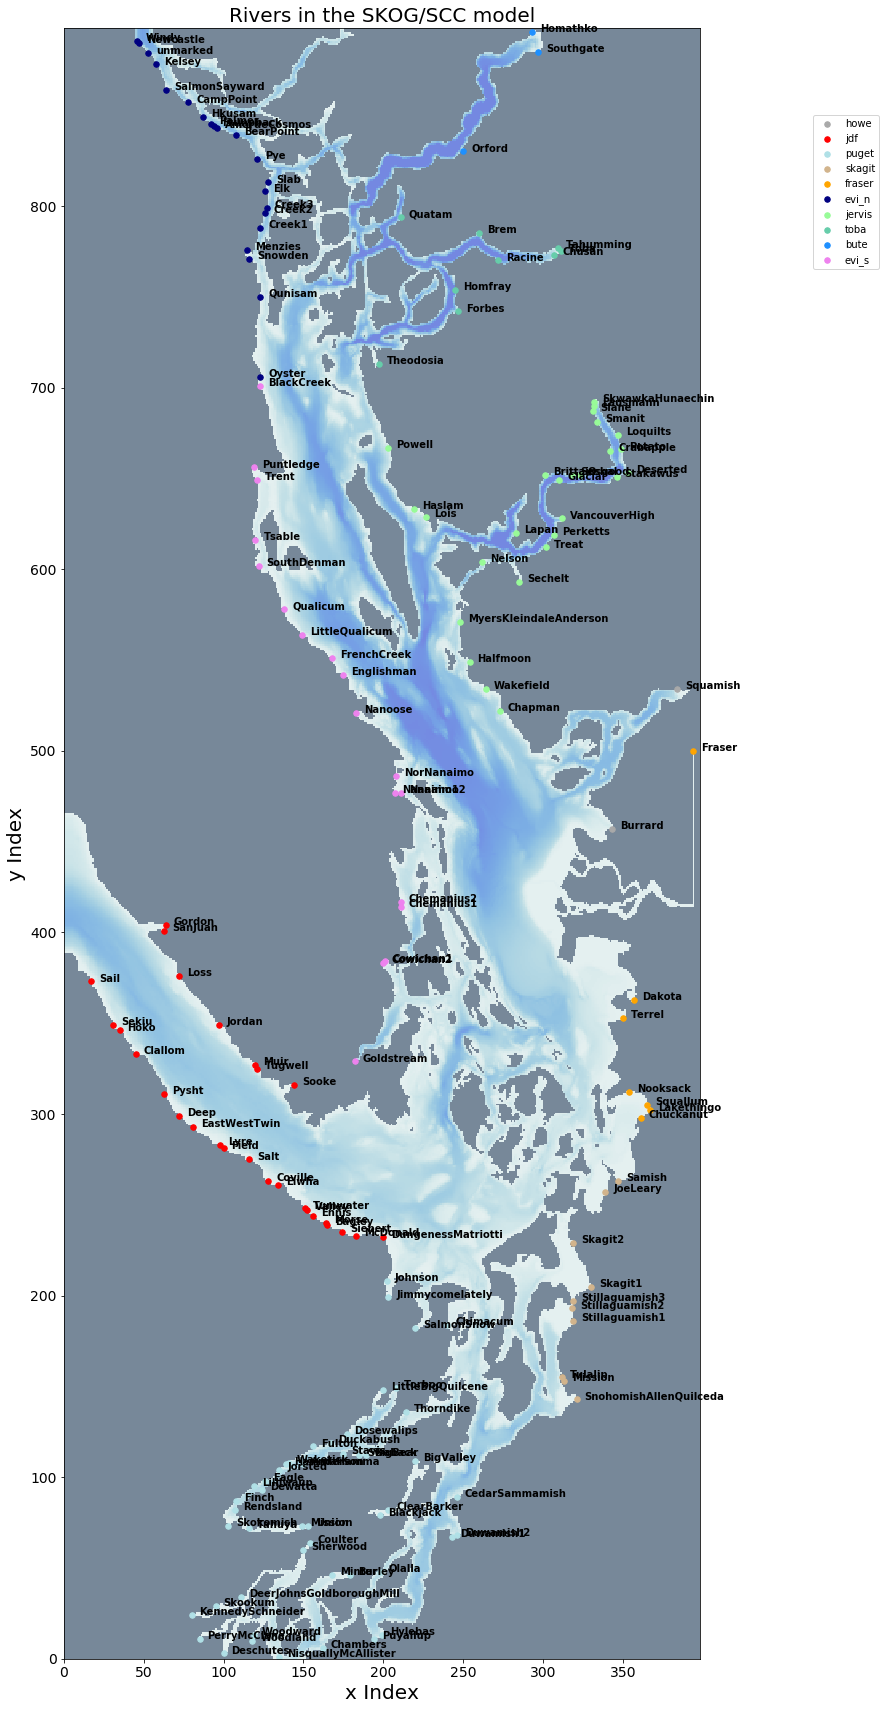

In [42]:
bath = nc.Dataset('/data/tjarniko/MEOPAR/grid/bathymetry_201702.nc')
bath1 = bath.variables['Bathymetry']
wshed_plot(bath1,'Rivers in the SKOG/SCC model', \
               cm.cm.dense,20,30,0,1000,'bathymetry','')

In [43]:
def wshed_wtext(surfdat_1,tit1,t_cmap,xsize,ysize,v_min1,v_max1,cl1,bigtit):
    "TESTED"

    fig, ax = plt.subplots(1, 1, figsize=(xsize, ysize), sharey=True)
    cmap = t_cmap
            

    tplt = np.ma.masked_values(surfdat_1,0)
    ax.set_title(tit1,fontsize = 20 )
    v_min = v_min1
    v_max = v_max1
    clabel = cl1

    viz_tools.set_aspect(ax)
    mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max) 
    ax.set_xlabel('x Index', fontsize = 20 )
    ax.set_ylabel('y Index', fontsize = 20 )
    

    watersheds = rv.prop_dict.keys()
    #watershed counter
    wc = 0
    tr = 0
    wsl = ['howe', 'jdf', 'puget', 'skagit', 'fraser', 'evi_n', 'jervis', 'toba', 'bute', 'evi_s']
    for watshed in watersheds:
        #print(watshed)
        rivs = rv.prop_dict[watshed].keys()
        #river counter for index
        rc = 0
        for riv in rivs:
            #print(riv)
            ti = rv.prop_dict[watshed][riv]['i']
            tj = rv.prop_dict[watshed][riv]['j']
            if rc==0: 
                pts = ax.scatter(tj,ti,s=30,c=cols[wc],label = wsl[wc],marker='o')
                
                #ax.text(tj+5,ti,riv, weight = 'bold', fontsize = 10)
            else:
                pts = ax.scatter(tj,ti,s=30,c=cols[wc],marker='o')
            if riv in model_riv:
                pts = ax.scatter(tj,ti,s=200,c=cols[wc],marker='*')
                ax.text(tj+5,ti,riv, weight = 'bold', fontsize = 15)

#             elif (tr%2==0):
#                 pts = ax.scatter(tj,ti,s=30,c=cols[wc],marker='o')
#                 ax.text(tj-20,ti,riv, weight = 'bold', fontsize = 10)
#             elif (tr%2!=0):
#                 pts = ax.scatter(tj,ti,s=30,c=cols[wc],marker='o')
#                 ax.text(tj+5,ti,riv, weight = 'bold', fontsize = 10)
            rc = rc+1
            tr = tr+1
#             print(rc)
#             print(tr)
        wc = wc+1

    plt.xlim([0,398])
    plt.ylim([0,898])
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    cmap.set_bad('lightslategray')
    plt.legend(bbox_to_anchor=(1.29, 0.95))
    plt.suptitle(bigtit,fontsize=20)

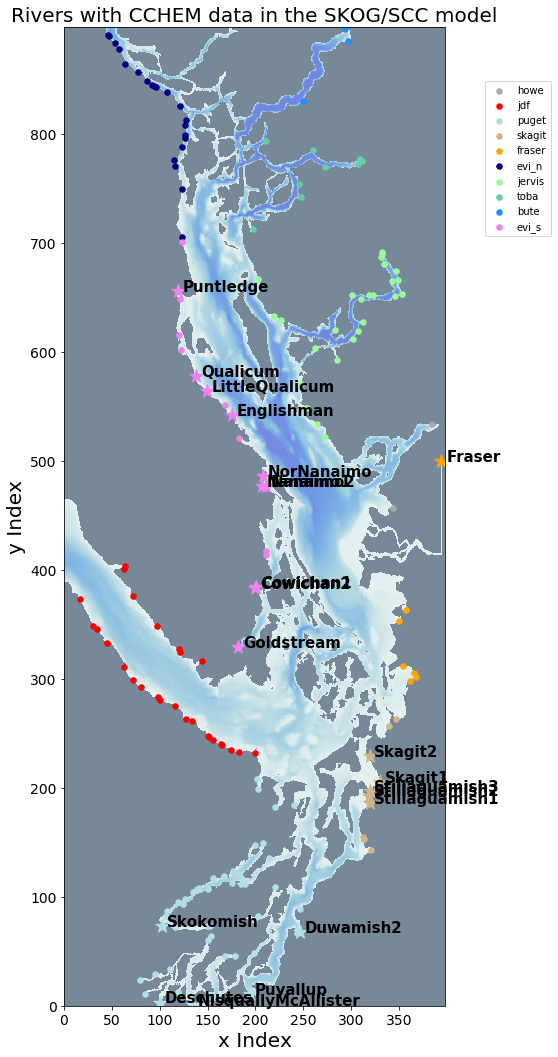

In [44]:
wshed_wtext(bath1,'Rivers with CCHEM data in the SKOG/SCC model', \
               cm.cm.dense,12,18,0,1000,'bathymetry','')

In [45]:
def wshed_wtext_gauge(surfdat_1,tit1,t_cmap,xsize,ysize,v_min1,v_max1,cl1,bigtit):
    "TESTED"

    fig, ax = plt.subplots(1, 1, figsize=(xsize, ysize), sharey=True)
    cmap = t_cmap
            

    tplt = np.ma.masked_values(surfdat_1,0)
    ax.set_title(tit1,fontsize = 20 )
    v_min = v_min1
    v_max = v_max1
    clabel = cl1

    viz_tools.set_aspect(ax)
    mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max) 
    ax.set_xlabel('x Index', fontsize = 20 )
    ax.set_ylabel('y Index', fontsize = 20 )
    

    watersheds = rv.prop_dict.keys()
    #watershed counter
    wc = 0
    tr = 0
    wsl = ['howe', 'jdf', 'puget', 'skagit', 'fraser', 'evi_n', 'jervis', 'toba', 'bute', 'evi_s']
    for watshed in watersheds:
        #print(watshed)
        rivs = rv.prop_dict[watshed].keys()
        #river counter for index
        rc = 0
        for riv in rivs:
            #print(riv)
            ti = rv.prop_dict[watshed][riv]['i']
            tj = rv.prop_dict[watshed][riv]['j']
            if rc==0: 
                pts = ax.scatter(tj,ti,s=30,c=cols[wc],label = wsl[wc],marker='o')

            else:
                pts = ax.scatter(tj,ti,s=30,c=cols[wc],marker='o')
            if riv in gauge_riv:
                pts = ax.scatter(tj,ti,s=200,c=cols[wc],marker='*')
                ax.text(tj+5,ti,riv, weight = 'bold', fontsize = 15)

            rc = rc+1
            tr = tr+1

        wc = wc+1

    plt.xlim([0,398])
    plt.ylim([0,898])
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    cmap.set_bad('lightslategray')
    plt.legend(bbox_to_anchor=(1.29, 0.95))
    plt.suptitle(bigtit,fontsize=20)

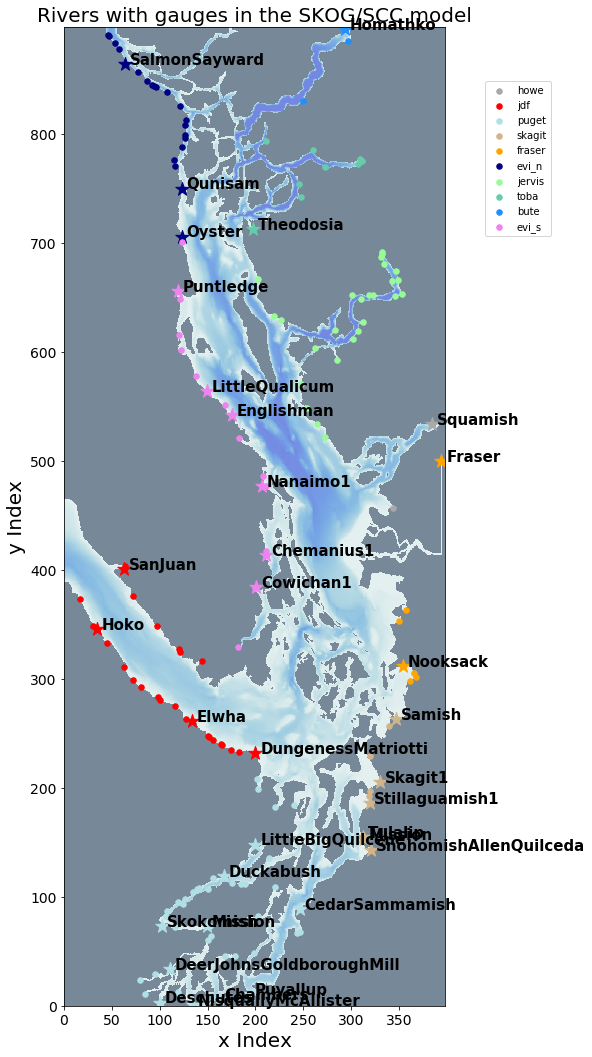

In [46]:
wshed_wtext_gauge(bath1,'Rivers with gauges in the SKOG/SCC model', \
               cm.cm.dense,12,18,0,1000,'bathymetry','')

In [47]:
runoff_table = np.zeros([171,12])
rivdat = nc.Dataset('/data/tjarniko/MEOPAR/rivers/rivers_month_201702.nc')
t_runoff = rivdat.variables['rorunoff']
#print(t_runoff.shape)
w = 90
#print(t_runoff[:,riv_j[w],riv_i[w]])

print(t_runoff)
for r in range(0,len(riv_i)):
    #print(riv_name[r])
    ti = riv_i[r]
    #print(ti)
    tj = riv_j[r]
    runoff = t_runoff[:,tj,ti]
    runoff_table[r,:] =t_runoff[:,tj,ti]

<class 'netCDF4._netCDF4.Variable'>
float32 rorunoff(time_counter, y, x)
    units: kg m-2 s-1
    long_name: runoff_flux
unlimited dimensions: time_counter
current shape = (12, 898, 398)
filling on, default _FillValue of 9.969209968386869e+36 used



In [48]:
wsl = ['howe', 'jdf', 'puget', 'skagit', 'fraser', 'evi_n', 'jervis', 'toba', 'bute', 'evi_s']
cols = ['darkgray','red','ghostwhite','tan','orange',\
    'navy','palegreen','mediumaquamarine','dodgerblue','violet']
ws_col = {'howe': {'color':'darkgray'},\
         'jdf': {'color':'red'},\
         'puget': {'color':'powderblue'},\
         'skagit': {'color':'tan'},\
         'fraser': {'color':'orange'},\
         'evi_n': {'color':'navy'},\
         'jervis': {'color':'palegreen'},\
         'toba': {'color':'mediumaquamarine'},\
         'bute': {'color':'dodgerblue'},\
         'evi_s': {'color':'violet'}}

ws_col['howe']

{'color': 'darkgray'}

In [49]:
#print(riv_name)
#print(riv_name == 'Fraser')

#riv_name.index('Fraser')
wsl = ['howe', 'jdf', 'puget', 'skagit', 'fraser', 'evi_n', 'jervis', 'toba', 'bute', 'evi_s']
riv_shed.index('howe')
#print(riv_shed)

shed_clim = np.zeros([10,12])

for w in range(0,len(wsl)):
    t_shed = wsl[w]
    indices = [i for i, x in enumerate(riv_shed) if x == t_shed]
    #print(indices)
    start_ind = indices[0]
    end_ind = indices[len(indices)-1]
    t_runoff = np.sum(runoff_table[start_ind:end_ind+1,:],0)
    shed_clim[w,:]=t_runoff
    #print(end_ind)


print(runoff_table[0,:])

print(runoff_table[1,:])
print('~')
print(shed_clim[0,:])

[0.61816508 0.70729113 0.66638255 0.98459643 1.85939431 2.23619246
 2.04238057 1.51061082 1.06683719 1.09384131 1.05779386 0.81105733]
[0.04499843 0.05148624 0.04850835 0.07167228 0.13535193 0.1627804
 0.14867215 0.10996275 0.07765888 0.0796246  0.07700058 0.05903975]
~
[0.66316351 0.75877737 0.7148909  1.05626871 1.99474624 2.39897287
 2.19105272 1.62057357 1.14449607 1.17346592 1.13479444 0.87009708]


No handles with labels found to put in legend.


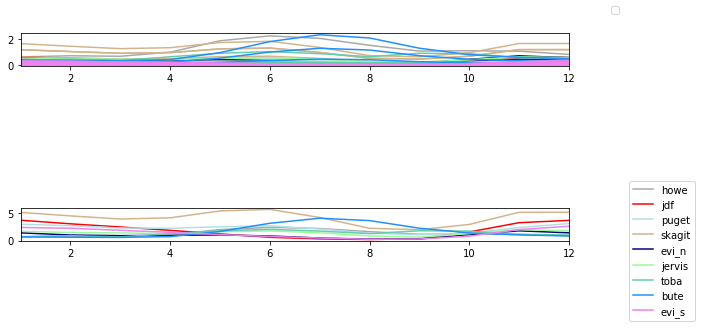

In [50]:
monr = np.arange(1,13,1)
fig = plt.figure(figsize=(10,5))

for i in range(1,3):
    ax = fig.add_subplot(2,1,i)
    #plt.xlim([0,93])

    if i == 1:
        for j in range(0,len(riv_i)):
            t_watershed = riv_shed[j]
            
            #print(j)
            if j != 93:
                
                ax.plot(monr,runoff_table[j,:],color = ws_col[t_watershed]['color'])
            
    ax.set_xlim([1,12])
    
    if i == 2:
        for j in range(0,len(shed_clim)):    
            t_watershed = wsl[j]
            #print(j)
            #if j != 93:
            if j != 4:   
                ax.plot(monr,shed_clim[j,:],color = ws_col[t_watershed]['color'],label=t_watershed)
            
    ax.set_xlim([1,12])    
    plt.legend(bbox_to_anchor=(1.1, 1.96))
    #ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

In [51]:
def one_panel_plot_noriv(surfdat_1,tit1,t_cmap,xsize,ysize,v_min1,v_max1,cl1,bigtit):
    "TESTED"

    fig, ax = plt.subplots(1, 1, figsize=(xsize, ysize), sharey=True)
    cmap = t_cmap
            

    tplt = np.ma.masked_values(surfdat_1,0)
    ax.set_title(tit1,fontsize = 20 )
    v_min = v_min1
    v_max = v_max1
    clabel = cl1

    viz_tools.set_aspect(ax)
    mesh = ax.pcolormesh(tplt, cmap=t_cmap, vmin=v_min, vmax=v_max)
    cbar = fig.colorbar(mesh, ax=ax)
    cbar.set_label(clabel, fontsize = 20 )
    cbar.ax.tick_params(labelsize=20)
 
    ax.set_xlabel('x Index', fontsize = 20 )
    ax.set_ylabel('y Index', fontsize = 20 )
    plt.xlim([0,398])
    plt.ylim([0,898])
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    cmap.set_bad('lightslategray')
    plt.legend(bbox_to_anchor=(1.29, 0.95))
    plt.suptitle(bigtit,fontsize=20)

In [52]:
#infil = np.loadtxt('./rivers_compiled.txt')
#infil = np.genfromtxt('./rivers_compiled.txt')
import pandas as pd
df = pd.read_csv('./rivers_compiled.csv',sep=',')

list(df)


['River', 'DIC', 'ALK', 'salinity', 'Watershed', 'Source of Data']

In [53]:
dic = df['ALK'][9]
print(dic)

482.16


['evi_s']
['evi_s', 'skagit']
['evi_s', 'skagit', 'puget']
Nim
Nim
Nim
Nim
Nim
Nim
nan


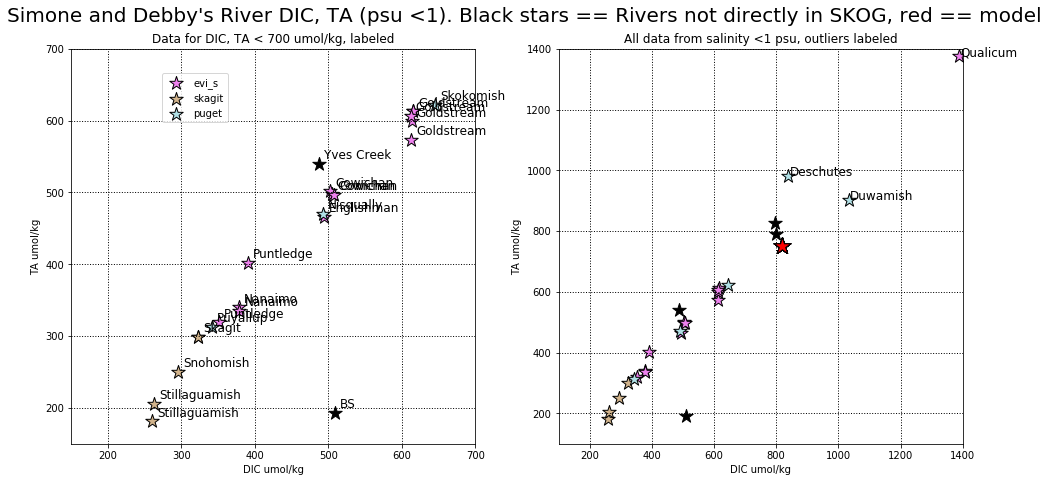

In [54]:
fig = plt.figure(figsize=(14,7))
from numpy.polynomial.polynomial import polyfit

for i in range(1,3):
    if i == 2:
        ax = fig.add_subplot(1,2,i)
        ax.grid(color='k', linestyle=':', linewidth=1)
        ax.set_ylim(100,1400)
        ax.set_xlim(100,1400)
        ax.set_ylabel('TA umol/kg')
        ax.set_xlabel('DIC umol/kg')
        plt.title('All data from salinity <1 psu, outliers labeled')
        for j in range(0,len(df['River'])):
            #print(df['River'])
            wsed = df['Watershed'][j]
            triv = df['River'][j]
            tdic = df['DIC'][j]
            talk = df['ALK'][j]
            if wsed in wsl:
                #print(wsed)
                if df['salinity'][j] < 1:
                    ax.scatter(tdic,talk, color = ws_col[wsed]['color'],marker='*',edgecolors='k',s=200)
                    ax.scatter(820,750, color = 'red',label = 'SKOG', marker='*',edgecolors='k',s=300)
                    if tdic > 800:
                        ax.text(tdic+5,talk,triv, fontsize = 12)
            if (wsed in wsl) == False:
                print(wsed)
                if df['salinity'][j] < 1:
                    ax.scatter(tdic,talk, color ='k',marker='*',edgecolors='k',s=200)

    if i == 1:
        ax = fig.add_subplot(1,2,i)
        ax.grid(color='k', linestyle=':', linewidth=1)
        ax.set_ylim(150,700)
        ax.set_xlim(150,700)
        ax.set_ylabel('TA umol/kg')
        ax.set_xlabel('DIC umol/kg')
        plt.title('Data for DIC, TA < 700 umol/kg, labeled')
        new_wsds =[]
        for j in range(0,len(df['River'])):
            #print(df['River'])
            wsed = df['Watershed'][j]
            triv = df['River'][j]
            tdic = df['DIC'][j]
            talk = df['ALK'][j]
            
            if wsed in wsl:
                #print(wsed)
                if df['salinity'][j] < 1:
                    if (wsed in new_wsds) == False:
                        ax.scatter(tdic,talk, color = ws_col[wsed]['color'],label = wsed, marker='*',edgecolors='k',s=200)
                        
                        new_wsds.append(wsed)
                        print(new_wsds)
                    if (wsed in new_wsds) == True:
                        ax.scatter(tdic,talk, color = ws_col[wsed]['color'], marker='*',edgecolors='k',s=200)
                    if tdic < 700:
                        ax.text(tdic+7,talk+7,triv, fontsize = 12)
            if (wsed in wsl) == False:
                if df['salinity'][j] < 1:
                    ax.scatter(tdic,talk, color ='k',marker='*',edgecolors='k',s=200)
                    if tdic < 700:
                        ax.text(tdic+7,talk+7,triv, fontsize = 12)
        plt.legend(bbox_to_anchor=(0.4, 0.95))
        plt.title('Data for DIC, TA < 700 umol/kg, labeled')    
    plt.suptitle('Simone and Debby\'s River DIC, TA (psu <1). Black stars == Rivers not directly in SKOG, red == model', fontsize = 20)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])


['evi_s']
no
no
no
['evi_s', 'skagit']
['evi_s', 'skagit', 'puget']


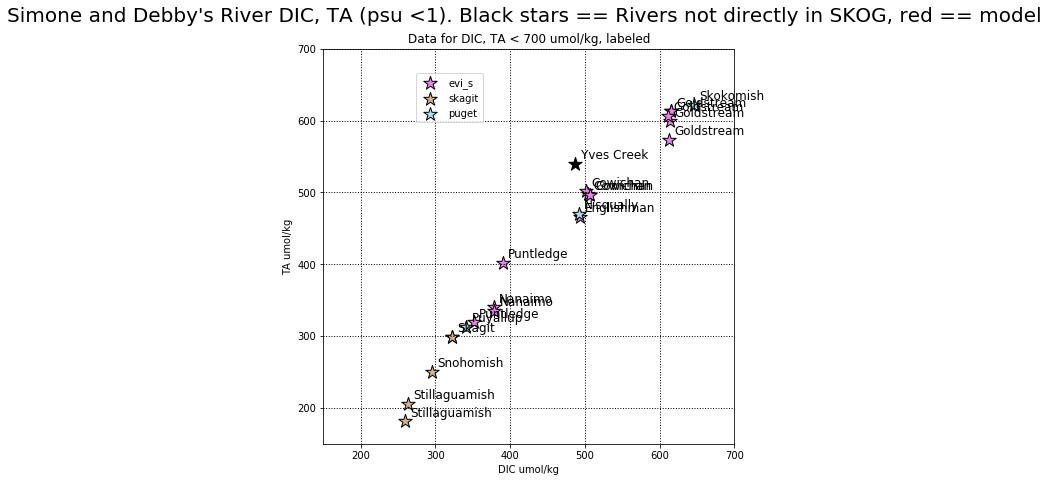

In [55]:
fig = plt.figure(figsize=(7,7))
from numpy.polynomial.polynomial import polyfit

for i in range(1,2):

    if i == 1:
        ax = fig.add_subplot(1,1,i)
        ax.grid(color='k', linestyle=':', linewidth=1)
        ax.set_ylim(150,700)
        ax.set_xlim(150,700)
        ax.set_ylabel('TA umol/kg')
        ax.set_xlabel('DIC umol/kg')
        plt.title('Data for DIC, TA < 700 umol/kg, labeled')
        new_wsds =[]
        for j in range(0,len(df['River'])):
            #print(df['River'])
            wsed = df['Watershed'][j]
            triv = df['River'][j]
            tdic = df['DIC'][j]
            talk = df['ALK'][j]
            
            if wsed in wsl:
                #print(wsed)
                if df['salinity'][j] < 1:
                    if (wsed in new_wsds) == False:
                        ax.scatter(tdic,talk, color = ws_col[wsed]['color'],label = wsed, marker='*',edgecolors='k',s=200)
                        
                        new_wsds.append(wsed)
                        print(new_wsds)
                    if (wsed in new_wsds) == True:
                        ax.scatter(tdic,talk, color = ws_col[wsed]['color'], marker='*',edgecolors='k',s=200)
                    if tdic < 700:
                        ax.text(tdic+7,talk+7,triv, fontsize = 12)
            if (wsed in wsl) == False:
                if df['salinity'][j] < 1:
                    if triv == 'BS':
                        print('no')
                    else:


                        ax.scatter(tdic,talk, color ='k',marker='*',edgecolors='k',s=200)
                        if tdic < 700:
                            ax.text(tdic+7,talk+7,triv, fontsize = 12)
        plt.legend(bbox_to_anchor=(0.4, 0.95))
        plt.title('Data for DIC, TA < 700 umol/kg, labeled')    
    plt.suptitle('Simone and Debby\'s River DIC, TA (psu <1). Black stars == Rivers not directly in SKOG, red == model', fontsize = 20)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])


In [56]:
TA_b = [500,1000,500,1000]
DIC_b = [500*1.032,1000*1.032,500*1.226,1000*1.226]


['evi_s']
['evi_s', 'skagit']
['evi_s', 'skagit', 'puget']
Nim
Nim
Nim
Nim
Nim
Nim
nan


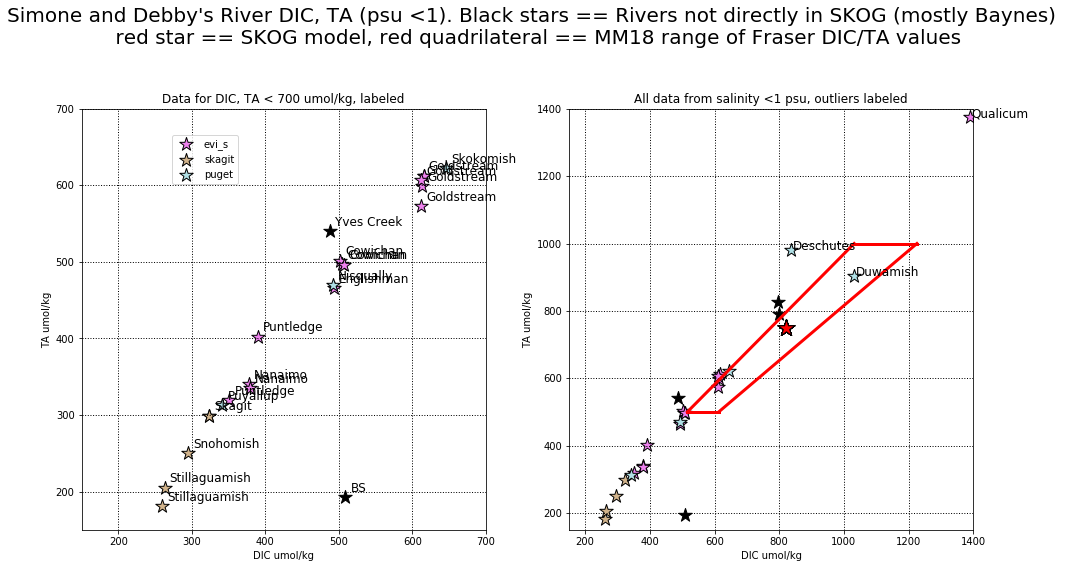

In [57]:
fig = plt.figure(figsize=(14,8))
from numpy.polynomial.polynomial import polyfit

for i in range(1,3):
    if i == 2:
        ax = fig.add_subplot(1,2,i)
        ax.grid(color='k', linestyle=':', linewidth=1)
        ax.set_ylim(150,1400)
        ax.set_xlim(150,1400)
        ax.set_ylabel('TA umol/kg')
        ax.set_xlabel('DIC umol/kg')
        plt.title('All data from salinity <1 psu, outliers labeled')
        TA_low = [500,1000]
        TA_high = [500,1000]
        DIC_low = [500*1.032,1000*1.032]
        DIC_high = [500*1.226,1000*1.226]
        DIC_le = [500*1.032,500*1.226]
        TA_le = [500,500]
        DIC_he = [1000*1.032,1000*1.226]
        TA_he = [1000,1000]
        ax.plot(DIC_low,TA_low,marker = 'o', color = 'red',markersize=1,linewidth=3)
        ax.plot(DIC_high,TA_high,marker = 'o', color = 'red',markersize=1,linewidth=3)
        ax.plot(DIC_le,TA_le,marker = 'o', color = 'red',markersize=1,linewidth=3)
        ax.plot(DIC_he,TA_he,marker = 'o', color = 'red',markersize=1,linewidth=3)
        #ax.fill_between(TA_low,DIC_high,DIC_low)
        #ax.fill_between(DIC_b,TA_b, facecolor='blue', alpha=0.5)
        for j in range(0,len(df['River'])):
            #print(df['River'])
            wsed = df['Watershed'][j]
            triv = df['River'][j]
            tdic = df['DIC'][j]
            talk = df['ALK'][j]
            if wsed in wsl:
                #print(wsed)
                if df['salinity'][j] < 1:
                    ax.scatter(tdic,talk, color = ws_col[wsed]['color'],marker='*',edgecolors='k',s=200)
                    ax.scatter(820,750, color = 'red',label = 'SKOG', marker='*',edgecolors='k',s=300)
                    if tdic > 800:
                        ax.text(tdic+5,talk,triv, fontsize = 12)
            if (wsed in wsl) == False:
                print(wsed)
                if df['salinity'][j] < 1:
                    ax.scatter(tdic,talk, color ='k',marker='*',edgecolors='k',s=200)

    if i == 1:
        ax = fig.add_subplot(1,2,i)
        ax.grid(color='k', linestyle=':', linewidth=1)
        ax.set_ylim(150,700)
        ax.set_xlim(150,700)
        ax.set_ylabel('TA umol/kg')
        ax.set_xlabel('DIC umol/kg')
        plt.title('Data for DIC, TA < 700 umol/kg, labeled')
        new_wsds =[]
        for j in range(0,len(df['River'])):
            #print(df['River'])
            wsed = df['Watershed'][j]
            triv = df['River'][j]
            tdic = df['DIC'][j]
            talk = df['ALK'][j]
            
            if wsed in wsl:
                #print(wsed)
                if df['salinity'][j] < 1:
                    if (wsed in new_wsds) == False:
                        ax.scatter(tdic,talk, color = ws_col[wsed]['color'],label = wsed, marker='*',edgecolors='k',s=200)
                        
                        new_wsds.append(wsed)
                        print(new_wsds)
                    if (wsed in new_wsds) == True:
                        ax.scatter(tdic,talk, color = ws_col[wsed]['color'], marker='*',edgecolors='k',s=200)
                    if tdic < 700:
                        ax.text(tdic+7,talk+7,triv, fontsize = 12)
            if (wsed in wsl) == False:
                if df['salinity'][j] < 1:
                    ax.scatter(tdic,talk, color ='k',marker='*',edgecolors='k',s=200)
                    if tdic < 700:
                        ax.text(tdic+7,talk+7,triv, fontsize = 12)
        plt.legend(bbox_to_anchor=(0.4, 0.95))
        plt.title('Data for DIC, TA < 700 umol/kg, labeled')    
    plt.suptitle('Simone and Debby\'s River DIC, TA (psu <1). Black stars == Rivers not directly in SKOG (mostly Baynes) \n red star == SKOG model, red quadrilateral == MM18 range of Fraser DIC/TA values', fontsize = 20)
    plt.tight_layout(rect=[0, 0.0, 1, 0.85])


No handles with labels found to put in legend.


Nim
Nim
Nim
Nim
Nim
Nim
nan
Nim
Nim
Nim
Nim
Nim
Nim
nan


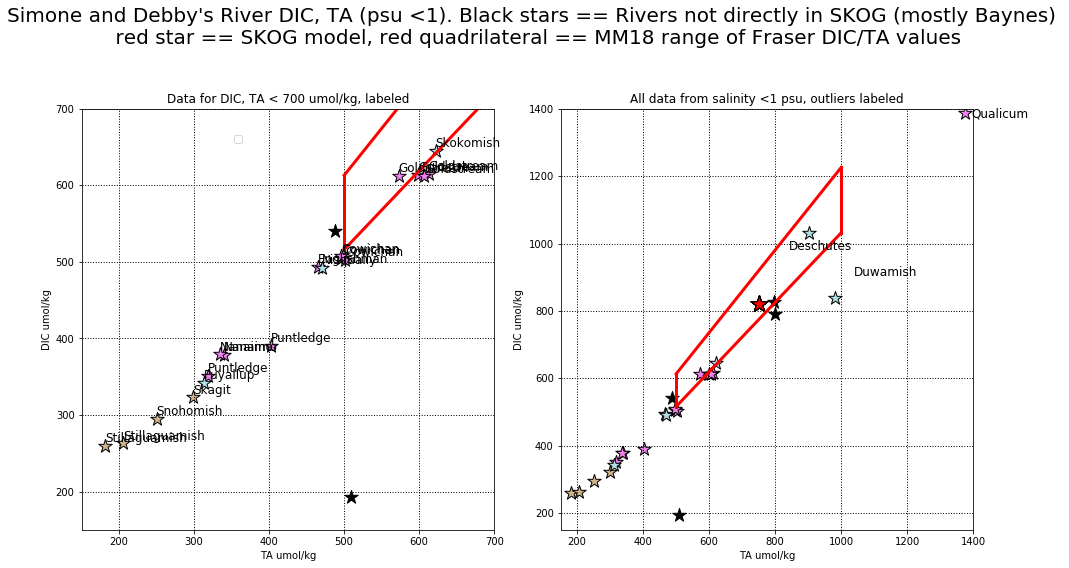

In [58]:
fig = plt.figure(figsize=(14,8))
from numpy.polynomial.polynomial import polyfit

for i in range(1,3):
    if i == 2:
        ax = fig.add_subplot(1,2,i)
        ax.grid(color='k', linestyle=':', linewidth=1)
        ax.set_ylim(150,1400)
        ax.set_xlim(150,1400)
        ax.set_xlabel('TA umol/kg')
        ax.set_ylabel('DIC umol/kg')
        plt.title('All data from salinity <1 psu, outliers labeled')
        TA_low = [500,1000]
        TA_high = [500,1000]
        DIC_low = [500*1.032,1000*1.032]
        DIC_high = [500*1.226,1000*1.226]
        DIC_le = [500*1.032,500*1.226]
        TA_le = [500,500]
        DIC_he = [1000*1.032,1000*1.226]
        TA_he = [1000,1000]
        ax.plot(TA_low,DIC_low,marker = 'o', color = 'red',markersize=1,linewidth=3)
        ax.plot(TA_high,DIC_high,marker = 'o', color = 'red',markersize=1,linewidth=3)
        ax.plot(TA_le,DIC_le,marker = 'o', color = 'red',markersize=1,linewidth=3)
        ax.plot(TA_he,DIC_he,marker = 'o', color = 'red',markersize=1,linewidth=3)
        #ax.fill_between(TA_low,DIC_high,DIC_low)
        #ax.fill_between(DIC_b,TA_b, facecolor='blue', alpha=0.5)
        for j in range(0,len(df['River'])):
            #print(df['River'])
            wsed = df['Watershed'][j]
            triv = df['River'][j]
            tdic = df['DIC'][j]
            talk = df['ALK'][j]
            if wsed in wsl:
                #print(wsed)
                if df['salinity'][j] < 1:
                    ax.scatter(talk,tdic, color = ws_col[wsed]['color'],marker='*',edgecolors='k',s=200)
                    ax.scatter(750,820, color = 'red',label = 'SKOG', marker='*',edgecolors='k',s=300)
                    if tdic > 800:
                        ax.text(tdic+5,talk,triv, fontsize = 12)
            if (wsed in wsl) == False:
                print(wsed)
                if df['salinity'][j] < 1:
                    ax.scatter(tdic,talk, color ='k',marker='*',edgecolors='k',s=200)

    if i == 1:
        ax = fig.add_subplot(1,2,i)
        ax.grid(color='k', linestyle=':', linewidth=1)
        ax.set_ylim(150,700)
        ax.set_xlim(150,700)
        ax.set_xlabel('TA umol/kg')
        ax.set_ylabel('DIC umol/kg')
        plt.title('All data from salinity <1 psu, outliers labeled')
        TA_low = [500,1000]
        TA_high = [500,1000]
        DIC_low = [500*1.032,1000*1.032]
        DIC_high = [500*1.226,1000*1.226]
        DIC_le = [500*1.032,500*1.226]
        TA_le = [500,500]
        DIC_he = [1000*1.032,1000*1.226]
        TA_he = [1000,1000]
        ax.plot(TA_low,DIC_low,marker = 'o', color = 'red',markersize=1,linewidth=3)
        ax.plot(TA_high,DIC_high,marker = 'o', color = 'red',markersize=1,linewidth=3)
        ax.plot(TA_le,DIC_le,marker = 'o', color = 'red',markersize=1,linewidth=3)
        ax.plot(TA_he,DIC_he,marker = 'o', color = 'red',markersize=1,linewidth=3)
        #ax.fill_between(TA_low,DIC_high,DIC_low)
        #ax.fill_between(DIC_b,TA_b, facecolor='blue', alpha=0.5)
        for j in range(0,len(df['River'])):
            #print(df['River'])
            wsed = df['Watershed'][j]
            triv = df['River'][j]
            tdic = df['DIC'][j]
            talk = df['ALK'][j]
            if wsed in wsl:
                #print(wsed)
                if df['salinity'][j] < 1:
                    ax.scatter(talk,tdic, color = ws_col[wsed]['color'],marker='*',edgecolors='k',s=200)
                    #ax.scatter(750,820, color = 'red',label = 'SKOG', marker='*',edgecolors='k',s=300)
                    if tdic < 700:
                        ax.text(talk,tdic+5,triv, fontsize = 12)
            if (wsed in wsl) == False:
                print(wsed)
                if df['salinity'][j] < 1:
                    ax.scatter(tdic,talk, color ='k',marker='*',edgecolors='k',s=200)
        plt.legend(bbox_to_anchor=(0.4, 0.95))
        plt.title('Data for DIC, TA < 700 umol/kg, labeled')    
    plt.suptitle('Simone and Debby\'s River DIC, TA (psu <1). Black stars == Rivers not directly in SKOG (mostly Baynes) \n red star == SKOG model, red quadrilateral == MM18 range of Fraser DIC/TA values', fontsize = 20)
    plt.tight_layout(rect=[0, 0.0, 1, 0.85])


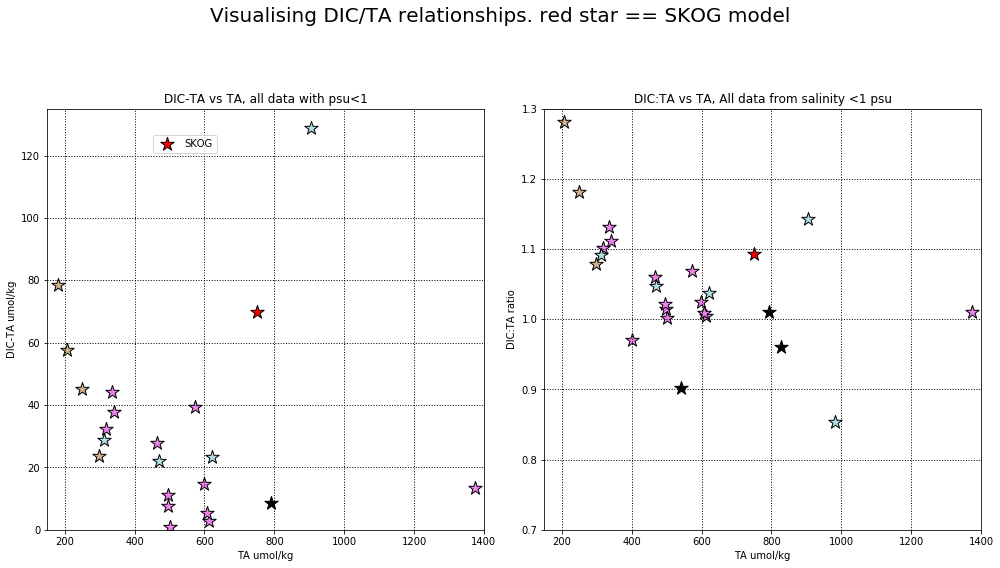

In [59]:
fig = plt.figure(figsize=(14,8))
from numpy.polynomial.polynomial import polyfit

for i in range(1,3):
    if i == 2:
        ax = fig.add_subplot(1,2,i)
        ax.grid(color='k', linestyle=':', linewidth=1)
        ax.set_ylim(0.7,1.3)
        ax.set_xlim(150,1400)
        ax.set_xlabel('TA umol/kg')
        ax.set_ylabel('DIC:TA ratio')
        plt.title('DIC:TA vs TA, All data from salinity <1 psu')
        for j in range(0,len(df['River'])):
            #print(df['River'])
            wsed = df['Watershed'][j]
            triv = df['River'][j]
            tdic = df['DIC'][j]
            talk = df['ALK'][j]
            if wsed in wsl:
                #print(wsed)
                if df['salinity'][j] < 1:
                    ax.scatter(talk,tdic/talk, color = ws_col[wsed]['color'],marker='*',edgecolors='k',s=200)
                    #ax.scatter(750,820, color = 'red',label = 'SKOG', marker='*',edgecolors='k',s=300)
                    #if tdic < 700:
                    #    ax.text(talk,tdic+5,triv, fontsize = 12)
#         
            if (wsed in wsl) == False:
                #print(wsed)
                if df['salinity'][j] < 1:
                    ax.scatter(talk,tdic/talk, color ='k',marker='*',edgecolors='k',s=200)
        ax.scatter(750,820/750, color = 'red',label = 'SKOG',marker='*',edgecolors='k',s=200)

    if i == 1:
        ax = fig.add_subplot(1,2,i)
        ax.grid(color='k', linestyle=':', linewidth=1)
        ax.set_ylim(0,135)
        ax.set_xlim(150,1400)
        ax.set_xlabel('TA umol/kg')
        ax.set_ylabel('DIC-TA umol/kg')
        plt.title('DIC:TA vs TA, All data from salinity <1 psu')
        for j in range(0,len(df['River'])):
            #print(df['River'])
            wsed = df['Watershed'][j]
            triv = df['River'][j]
            tdic = df['DIC'][j]
            talk = df['ALK'][j]
            if wsed in wsl:
                #print(wsed)
                if df['salinity'][j] < 1:
                    ax.scatter(talk,tdic-talk, color = ws_col[wsed]['color'],marker='*',edgecolors='k',s=200)
                    #ax.scatter(750,820, color = 'red',label = 'SKOG', marker='*',edgecolors='k',s=300)
                    #if tdic < 700:
                    #    ax.text(talk,tdic+5,triv, fontsize = 12)
#         
            if (wsed in wsl) == False:
                #print(wsed)
                if df['salinity'][j] < 1:
                    ax.scatter(talk,tdic-talk, color ='k',marker='*',edgecolors='k',s=200)
        ax.scatter(750,820-750, color = 'red',label = 'SKOG',marker='*',edgecolors='k',s=200)
        plt.legend(bbox_to_anchor=(0.4, 0.95))
        plt.title('DIC-TA vs TA, all data with psu<1')    
    plt.suptitle('Visualising DIC/TA relationships. red star == SKOG model', fontsize = 20)
    plt.tight_layout(rect=[0, 0.0, 1, 0.85])


In [60]:
tdic = df['DIC'][:]
talk = df['ALK'][:]

dic_ta = tdic/talk

In [61]:
#print(820/750)
#print(np.mean(dic_ta))
print('mean of DIC measurements')
print(np.mean(tdic))
print('mean of TA measurements')
print(np.mean(talk))
print(660/630)


mean of DIC measurements
659.9378125000001
mean of TA measurements
628.7581249999998
1.0476190476190477


In [62]:
# fig = plt.figure(figsize=(6,6))
# from numpy.polynomial.polynomial import polyfit

# for i in range(1,2):
#     if i == 1:
#         ax = fig.add_subplot(1,1,i)
#         ax.grid(color='k', linestyle=':', linewidth=1)
#         #ax.set_ylim(0.7,1.3)
#         #ax.set_xlim(150,1400)
#         ax.set_xlabel('DIC umol/kg')
#         ax.set_ylabel('TA ratio')
#         plt.title('DIC:TA vs TA, All data from salinity <1 psu')
#         ax.scatter(tdic,820/750, color = 'red',label = 'SKOG',marker='*',edgecolors='k',s=200)

# #         for j in range(0,len(df['River'])):
# #             #print(df['River'])
# #             wsed = df['Watershed'][j]
# #             triv = df['River'][j]
# #             tdic = df['DIC'][j]
# #             talk = df['ALK'][j]
# #             if wsed in wsl:
# #                 #print(wsed)
# #                 if df['salinity'][j] < 1:
# #                     ax.scatter(talk,tdic/talk, color = ws_col[wsed]['color'],marker='*',edgecolors='k',s=200)
# #                     #ax.scatter(750,820, color = 'red',label = 'SKOG', marker='*',edgecolors='k',s=300)
# #                     #if tdic < 700:
# #                     #    ax.text(talk,tdic+5,triv, fontsize = 12)
# #         
# #             if (wsed in wsl) == False:
# #                 print(wsed)
# #                 if df['salinity'][j] < 1:
# #                     ax.scatter(talk,tdic/talk, color ='k',marker='*',edgecolors='k',s=200)
# #         ax.scatter(750,820/750, color = 'red',label = 'SKOG',marker='*',edgecolors='k',s=200)


In [63]:
# w = nc.Dataset('/data/tjarniko/MEOPAR/rivers/bio/rivers_bio_tracers_m12d31.nc')
# print(w)